# This notebook contains the SSVEP analysis through the EEG data collected- so that the participant can destroy bots by focusing on the bot with a particular frequency.  

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
freq8 = pd.read_csv('drive/My Drive/LeBrain - Neureality 2024/ssvep/sunday data/latest/ssvep_8hz.csv')
freq15 = pd.read_csv('drive/My Drive/LeBrain - Neureality 2024/ssvep/sunday data/latest/ssvep_15hz.csv')
freq25 = pd.read_csv('drive/My Drive/LeBrain - Neureality 2024/ssvep/sunday data/latest/ssvep_25hz.csv')
freq35 = pd.read_csv('drive/My Drive/LeBrain - Neureality 2024/ssvep/sunday data/latest/ssvep_35hz.csv')


In [3]:
freq8 = freq8.iloc[1200:, 4:8]
freq15 = freq15.iloc[1200:, 4:8]
freq25 = freq25.iloc[1200:, 4:8]
freq35 = freq35.iloc[1200:, 4:8]

# freq8.columns = ['0', '1', '2','3','4','5','6','7']
# freq15.columns = ['0', '1', '2','3','4','5','6','7']
# freq25.columns = ['0', '1', '2','3','4','5','6','7']
# freq35.columns = ['0', '1', '2','3','4','5','6','7']

freq8.columns = ['4','5','6','7']
freq15.columns = ['4','5','6','7']
freq25.columns = ['4','5','6','7']
freq35.columns = ['4','5','6','7']

In [4]:
# import numpy as np
# grouped_freq8 = freq8.apply(lambda row: np.array(row), axis=1).to_frame(name='combined')
# grouped_freq15 = freq15.apply(lambda row: np.array(row), axis=1).to_frame(name='combined')
# grouped_freq25 = freq25.apply(lambda row: np.array(row), axis=1).to_frame(name='combined')
# grouped_freq35 = freq35.apply(lambda row: np.array(row), axis=1).to_frame(name='combined')


In [5]:
# def combine_rows(group):
#     return np.array(group.values.flatten())

# # Combine every 2500 rows
# grouped_freq8 = freq8.groupby(np.arange(len(freq8)) // 1250).apply(combine_rows).to_frame(name='combined')
# grouped_freq15 = freq15.groupby(np.arange(len(freq15)) // 1250).apply(combine_rows).to_frame(name='combined')
# grouped_freq25 = freq25.groupby(np.arange(len(freq25)) // 1250).apply(combine_rows).to_frame(name='combined')
# grouped_freq35 = freq35.groupby(np.arange(len(freq35)) // 1250).apply(combine_rows).to_frame(name='combined')

In [6]:
len(freq8)

18298

In [7]:
grouped_freq8=freq8
grouped_freq15=freq15
grouped_freq25=freq25
grouped_freq35=freq35

In [8]:
grouped_freq8['label'] = 1
grouped_freq15['label'] = 2
grouped_freq25['label'] = 3
grouped_freq35['label'] = 4

# grouped_left=grouped_left[:29]
# grouped_right=grouped_right[:30]
grouped_freq8=grouped_freq8[:18125]
grouped_freq15=grouped_freq15[:21250]
grouped_freq25=grouped_freq25[:21250]
grouped_freq35=grouped_freq35[:21250]

In [9]:
stacked_df = pd.concat([grouped_freq8, grouped_freq15,grouped_freq25,grouped_freq35], axis=0, ignore_index=True)

In [10]:
stacked_df

,4,5,6,7,label
0,-12.476,-11.099,-10.981,-11.904,1
1,-11.458,-11.297,-10.054,-11.148,1
2,-7.537,-8.892,-5.506,-7.811,1
3,-3.297,-3.568,-0.499,-4.404,1
4,-2.526,-0.596,0.392,-3.567,1
...,...,...,...,...,...
81870,32.981,28.284,22.970,26.641,4
81871,28.825,24.708,18.551,23.104,4
81872,23.999,19.888,14.536,19.680,4
81873,21.670,16.476,11.905,18.536,4


In [11]:
stacked_df['label'].value_counts()

2    21250
3    21250
4    21250
1    18125
Name: label, dtype: int64

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout
import tensorflow as tf

# Sample DataFrame with 8 attributes and a label column
# Replace 'df' with your DataFrame
# df = ...

# Prepare sequences of 2500 rows each
sequence_length = 625
num_features = 4

X = []
y = []

df_attributes = stacked_df.drop(columns=['label'])

for i in range(0, len(df_attributes) - sequence_length + 1, sequence_length):
    sequence = df_attributes.iloc[i:i + sequence_length].values
    X.append(sequence)

X = np.array(X)
# Determine labels based on the first row in each sequence
# y = np.array([seq[0][0] for seq in X])
y = [1] * 29 + [2] * 34 + [3] * 34 + [4] * 34
y = np.array(y)
one_hot_y = tf.one_hot(y, depth=4).numpy()

# Convert the list to a NumPy array
#y = np.array(y)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, test_size=0.25, random_state=42)

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(sequence_length, num_features)),
    Dropout(0.1),
    LSTM(16, return_sequences=True),
    Dropout(0.1),
    LSTM(8),
    Dense(8, activation='relu'),
    Dropout(0.1),
    Dense(4, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/50
13/13 [==============================] - 15s 682ms/step - loss: 0.9612 - accuracy: 0.2551 - val_loss: 1.0718 - val_accuracy: 0.2727
Epoch 2/50
13/13 [==============================] - 10s 783ms/step - loss: 0.9202 - accuracy: 0.2653 - val_loss: 1.0551 - val_accuracy: 0.2727
Epoch 3/50
13/13 [==============================] - 13s 1s/step - loss: 0.9054 - accuracy: 0.2653 - val_loss: 1.0340 - val_accuracy: 0.2424
Epoch 4/50
13/13 [==============================] - 12s 925ms/step - loss: 0.8733 - accuracy: 0.2857 - val_loss: 1.0262 - val_accuracy: 0.3030
Epoch 5/50
13/13 [==============================] - 8s 599ms/step - loss: 0.8526 - accuracy: 0.2959 - val_loss: 1.0200 - val_accuracy: 0.2424
Epoch 6/50
13/13 [==============================] - 9s 723ms/step - loss: 0.8561 - accuracy: 0.2653 - val_loss: 1.0240 - val_accuracy: 0.2424
Epoch 7/50
13/13 [==============================] - 9s 701ms/step - loss: 0.8446 - accuracy: 0.3061 - val_loss: 1.0119 - val_accuracy: 0.2424
Epoch

In [14]:
model.save("SSVEP_time_series_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


JUST SOME PLOTS BEYOND THIS POINT

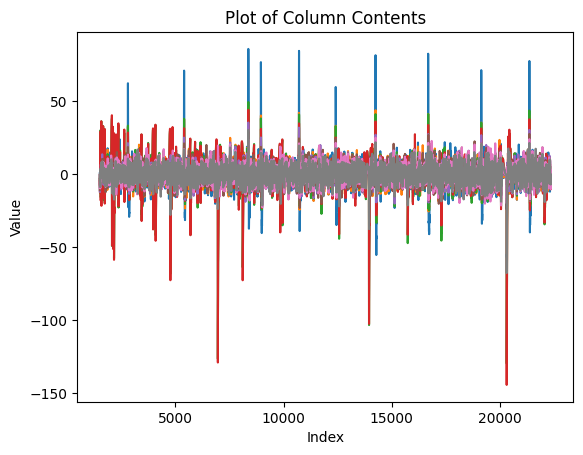

In [ ]:
import matplotlib.pyplot as plt

# Assuming column_contents contains the contents of the column you want to plot

# Plot the column contents
plt.plot(freq8.iloc[1500:,:8])

# Add labels and title
plt.xlabel('Index')  # or you can use plt.xlabel('Time') if it's a time-based column
plt.ylabel('Value')
plt.title('Plot of Column Contents')

# Show the plot
plt.show()
